In this kernel, we will conduct EDA to select important variables for breast cancer prediction and apply several models(logistic/ decision tree/ random forest/ SVM) to find out the best models. Enjoy! 

In [5]:
#supress warning 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import tree


In [91]:
data = pd.read_csv('cancer.csv')

In [96]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Attribute Information:

1) ID number  
2) Diagnosis (M = malignant, B = benign)


Ten real-valued features are computed for each cell nucleus:  

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [94]:
#remove last columns, also we don't need id
data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

In [97]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

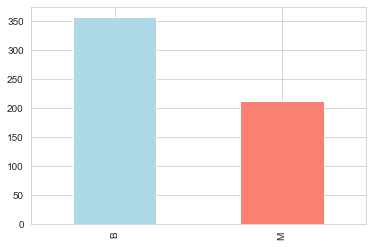

In [26]:
sns.set_style('whitegrid')
data.diagnosis.value_counts().plot(kind='bar',color=["lightblue", "salmon"])

In [98]:
categorical_val=[]
continuous_val=[]
for c in data.columns:
    #print('==================')
    #print(f"{c}:{data[c].unique()}")
    if len(data[c].unique()) <= 10:
        categorical_val.append(c)
    else:
        continuous_val.append(c)

In [99]:
print(categorical_val)
print(continuous_val)

['diagnosis']
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


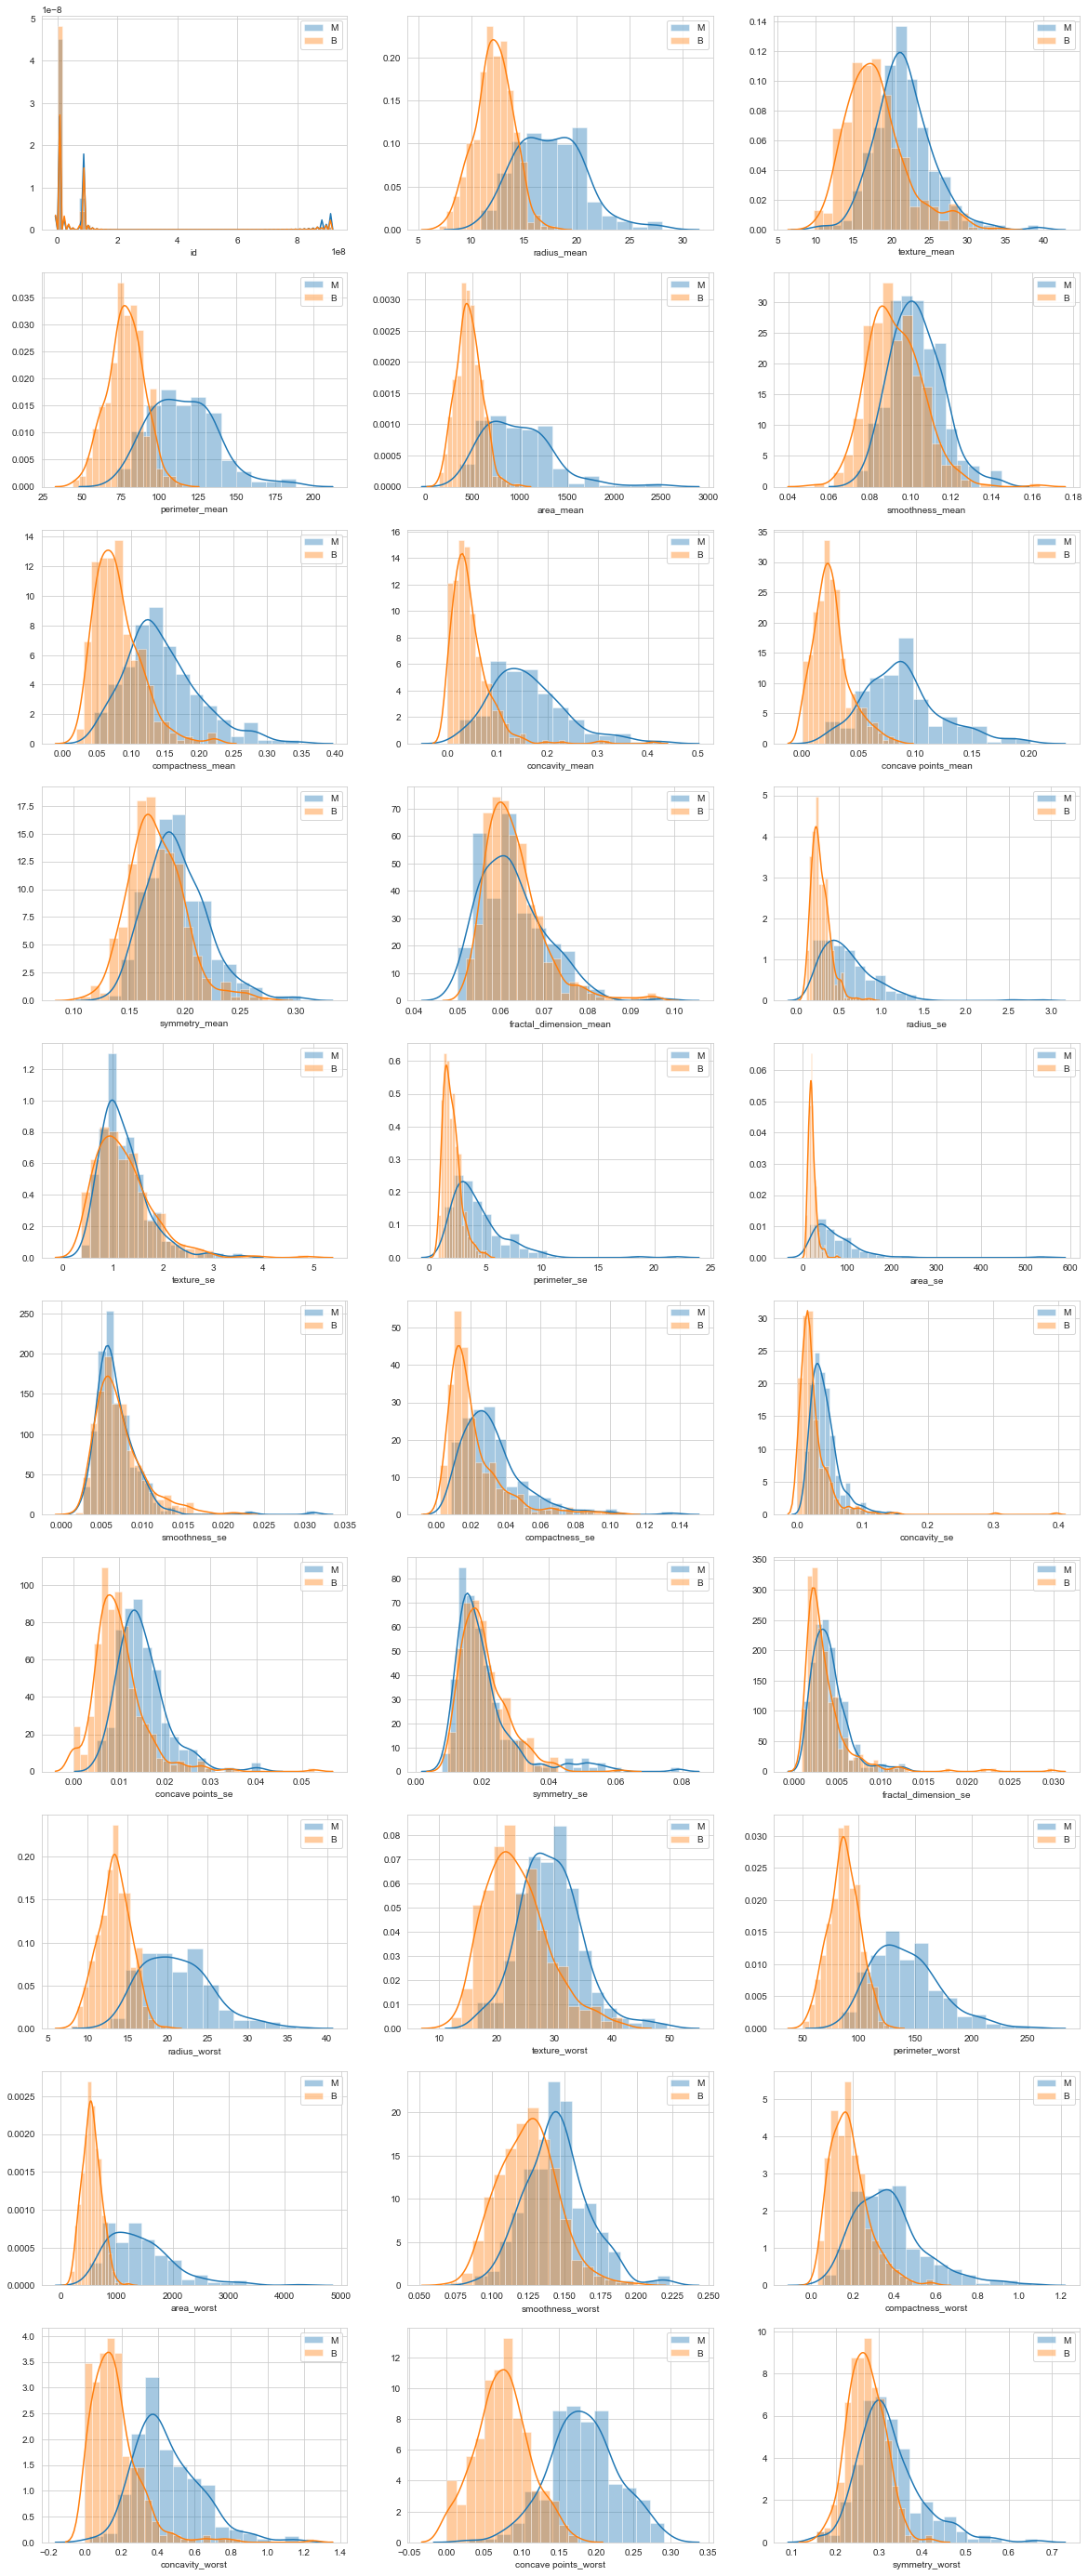

In [36]:
plt.figure(figsize=(20,50))
for i, column in enumerate(continuous_val,1):
    plt.subplot(10,3,i)
    sns.distplot(data[data['diagnosis']=='M'][column],rug=False,label="M")
    sns.distplot(data[data['diagnosis']=='B'][column],rug=False,label='B')
    plt.xlabel(column)
    plt.legend()

We can found malignant and benign tumors show different distribution in some columns:  
radius_mean: malignant tumors has lager radius mean.  
perimeter_mean: malignant tumors has lager perimeter mean.  
area_mean: malignant tumors has lager area mean.
compactness_mean: malignant tumors has lager compactness mean.  
concavity_mean: malignant tumors has lager concavity_mean.  
concavity_points_mean: malignant tumors has lager concavity_points_mean.  


In [100]:
df = data.replace({'diagnosis':{"M":1,"B":0}})

In [101]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(31.0, 0.0)

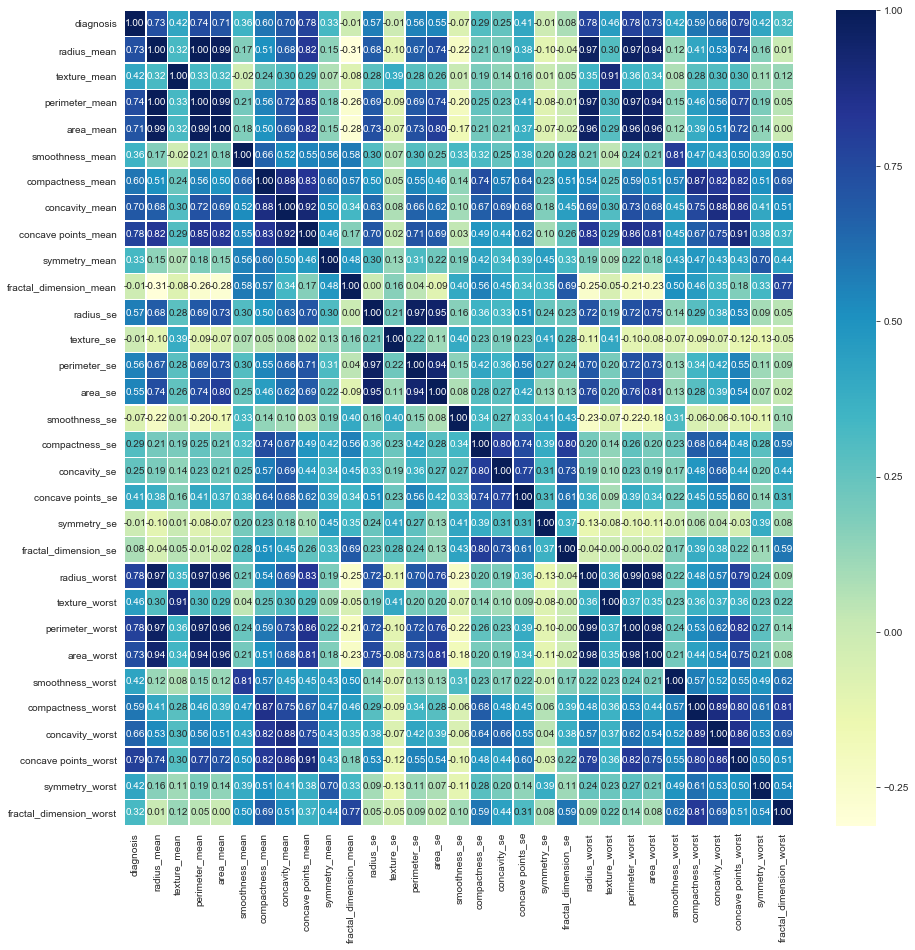

In [102]:
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f',cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

Some columns are correlated with each other. For example, area_mean, perimeter_mean and area_mean basically are same things. Thus, we can just keep 1 column to avoid collinearity. For other simulate columns, we'll do the same thing.

In [105]:
col_drop = ['perimeter_mean','radius_mean','compactness_mean',
            'concave points_mean','radius_se','perimeter_se',
            'radius_worst','perimeter_worst','compactness_worst',
            'concave points_worst','compactness_se','concave points_se',
            'texture_worst','area_worst','concavity_worst']
df2 = df.drop(col_drop,axis=1)

In [106]:
df2.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.4601,0.11890
1,1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
2,1,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
3,1,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
4,1,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678


(16.0, 0.0)

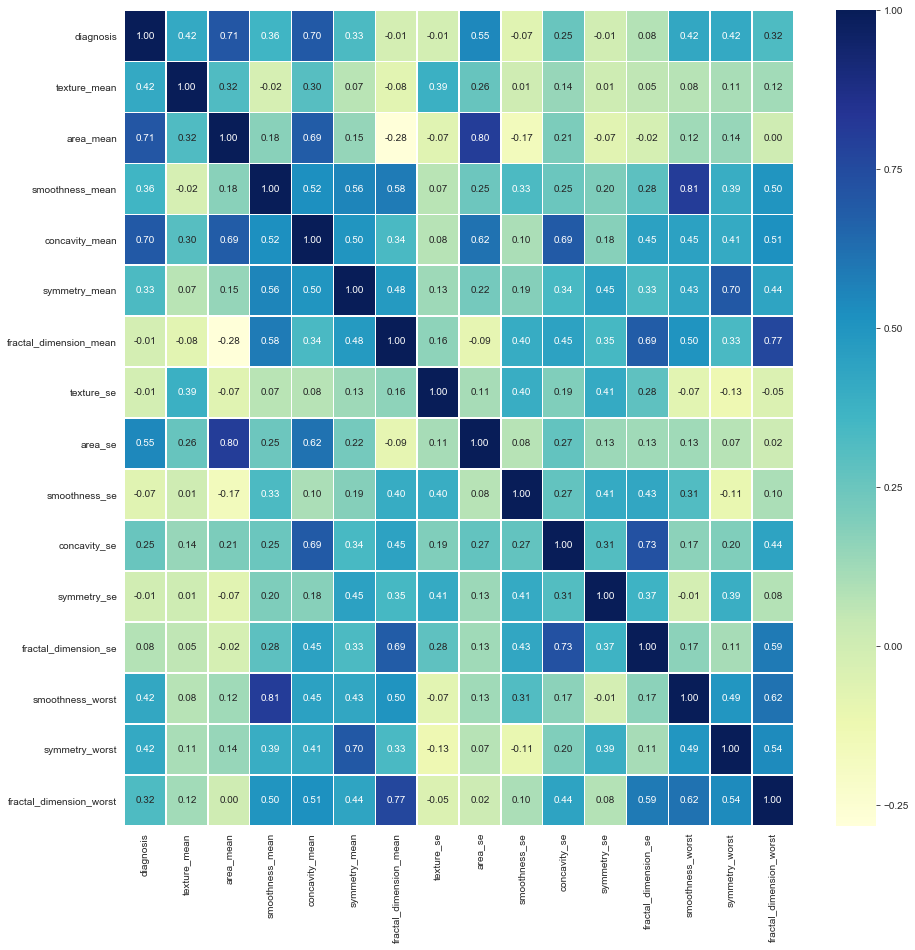

In [107]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df2.corr(), annot=True, linewidths=0.5, fmt='.2f',cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [108]:
x = df2.drop('diagnosis',axis=1)

In [114]:
x.shape

(569, 15)

In [115]:
#Calculate VIF 
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["features"] = x.columns
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]


In [116]:
vif

,features,VIF Factor
0,texture_mean,32.816586
1,area_mean,21.116431
2,smoothness_mean,286.285387
3,concavity_mean,15.246612
4,symmetry_mean,157.121418
5,fractal_dimension_mean,315.761211
6,texture_se,11.840914
7,area_se,6.157053
8,smoothness_se,20.367458
9,concavity_se,8.920661


In [117]:
while vif[vif['VIF Factor'] > 10]['VIF Factor'].any():    
    remove = vif.sort_values('VIF Factor',ascending=0)['features'][1] 
    #print(remove)
    #print(continuous_val)
    x.drop(remove,axis=1,inplace=True)
    vif = pd.DataFrame()
    vif["features"] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    print(vif)
    print('======================')
    

                   features  VIF Factor
0              texture_mean   27.462140
1           smoothness_mean  282.863719
2            concavity_mean   12.584246
3             symmetry_mean  156.975666
4    fractal_dimension_mean  310.496874
5                texture_se   11.555680
6                   area_se    3.862187
7             smoothness_se   20.210026
8              concavity_se    8.588896
9               symmetry_se   27.660955
10     fractal_dimension_se   14.706977
11         smoothness_worst  280.520785
12           symmetry_worst  157.248245
13  fractal_dimension_worst  170.521655
                   features  VIF Factor
0              texture_mean   26.758830
1            concavity_mean   11.665907
2             symmetry_mean  140.506133
3    fractal_dimension_mean  243.926544
4                texture_se   11.538468
5                   area_se    3.851142
6             smoothness_se   18.496206
7              concavity_se    8.303634
8               symmetry_se   26.185658


ValueError: zero-size array to reduction operation maximum which has no identity

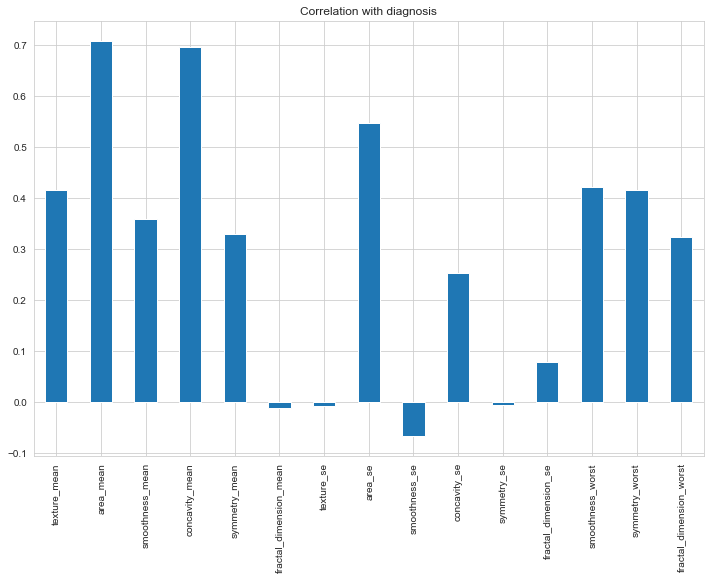

In [118]:
df2.drop('diagnosis',axis=1).corrwith(df.diagnosis).plot(kind='bar',grid=True,figsize=(12,8),
                                                       title='Correlation with diagnosis')

We see lots of features are highly correlated with diagnosis. 

# Model Preparation

In [124]:
#there is no categorical variable other than our dependent variables, so we don't have to creat dummy variables for our models.
categorical_val

Index(['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [136]:
#store variable names 
col_sc = list(df2.columns)
col_sc.remove('diagnosis')

In [137]:
col_sc

['texture_mean',
 'area_mean',
 'smoothness_mean',
 'concavity_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'texture_se',
 'area_se',
 'smoothness_se',
 'concavity_se',
 'symmetry_se',
 'fractal_dimension_se',
 'smoothness_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [138]:
#scale our data
#from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df2[col_sc] = sc.fit_transform(df2[col_sc])

In [139]:
df2.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,-2.073335,0.984375,1.568466,2.652874,2.217515,2.255747,-0.565265,2.487578,-0.214002,0.724026,1.148757,0.907083,1.307686,2.750622,1.937015
1,1,-0.353632,1.908708,-0.826962,-0.023846,0.001392,-0.868652,-0.876244,0.742402,-0.605351,-0.440780,-0.805450,-0.099444,-0.375612,-0.243890,0.281190
2,1,0.456187,1.558884,0.942210,1.363478,0.939685,-0.398008,-0.780083,1.181336,-0.297005,0.213076,0.237036,0.293559,0.527407,1.152255,0.201391
3,1,0.253732,-0.764464,3.283553,1.915897,2.867383,4.910919,-0.110409,-0.288378,0.689702,0.819518,4.732680,2.047511,3.394275,6.046041,4.935010
4,1,-1.151816,1.826229,0.280372,1.371011,-0.009560,-0.562450,-0.790244,1.190357,1.483067,0.828471,-0.361092,0.499328,0.220556,-0.868353,-0.397100


# Applying Machine Learning Algorithms

In [156]:
#from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def score(m, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred=m.predict(x_train)
        print('Train Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_train, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_train, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_train, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, pred)}")
    elif train == False:
        pred=m.predict(x_test)
        print('Test Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_test, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred)}")
            
    

In [144]:
#from sklearn.model_selection import train_test_split

x = df2.drop('diagnosis',axis=1)
y = df2['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

## M1: Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg = logreg.fit(x_train, y_train)

In [151]:
score(logreg, x_train, y_train, x_test, y_test, train=True)

Train Result:

Accuracy Score: 97.49%
Precision Score: 98.60%
Recall Score: 94.63%
F1 score: 96.58%
Confusion Matrix:
 [[247   2]
 [  8 141]]


In [157]:
score(logreg, x_train, y_train, x_test, y_test, train=False)

Test Result:

Accuracy Score: 97.66%
Precision Score: 95.38%
Recall Score: 98.41%
F1 score: 96.88%
Confusion Matrix:
 [[105   3]
 [  1  62]]


The result looks pretty great. How about we tuning our model to prevent over-fitting issue and make the model become more general to unseen samples?

In [161]:
#C represents the strength of the regularization. higher values of C correspond to less regularization
C = [1, .5, .25, .1, .05, .025, .01, .005, .0025] 
l1_metrics = np.zeros((len(C), 5)) 
l1_metrics[:,0] = C

for index in range(0, len(C)):
    logreg = LogisticRegression(penalty='l1', C=C[index], solver='liblinear') 
    logreg = logreg.fit(x_train, y_train)
    pred_test_Y = logreg.predict(x_test)
    l1_metrics[index,1] = np.count_nonzero(logreg.coef_) 
    l1_metrics[index,2] = accuracy_score(y_test, pred_test_Y) 
    l1_metrics[index,3] = precision_score(y_test, pred_test_Y) 
    l1_metrics[index,4] = recall_score(y_test, pred_test_Y)
    
col_names = ['C','Non-Zero Coeffs','Accuracy','Precision','Recall'] 
print(pd.DataFrame(l1_metrics, columns=col_names))

        C  Non-Zero Coeffs  Accuracy  Precision    Recall
0  1.0000             10.0  0.970760   0.939394  0.984127
1  0.5000              9.0  0.976608   0.953846  0.984127
2  0.2500              8.0  0.982456   0.968750  0.984127
3  0.1000              6.0  0.976608   0.968254  0.968254
4  0.0500              5.0  0.976608   0.968254  0.968254
5  0.0250              5.0  0.941520   0.934426  0.904762
6  0.0100              2.0  0.929825   0.918033  0.888889
7  0.0050              0.0  0.631579   0.000000  0.000000
8  0.0025              0.0  0.631579   0.000000  0.000000


We finally choose C=0.25 because it got best performance with fewer parameters.

In [162]:
logreg_t = LogisticRegression(penalty='l1', C=0.25, solver='liblinear')
logreg_t = logreg_t.fit(x_train,y_train)

In [163]:
score(logreg_t, x_train, y_train, x_test, y_test, train=True)

Train Result:

Accuracy Score: 97.74%
Precision Score: 99.30%
Recall Score: 94.63%
F1 score: 96.91%
Confusion Matrix:
 [[248   1]
 [  8 141]]


In [164]:
score(logreg_t, x_train, y_train, x_test, y_test, train=False)

Test Result:

Accuracy Score: 98.25%
Precision Score: 96.88%
Recall Score: 98.41%
F1 score: 97.64%
Confusion Matrix:
 [[106   2]
 [  1  62]]


Great! This model got slightly better in test sample than the original one. 

## M2: Decision Tree

In [174]:
from sklearn import tree

tree1 = tree.DecisionTreeClassifier()
tree1 = tree1.fit(x_train, y_train)

In [175]:
score(tree1, x_train, y_train, x_test, y_test, train=True)

Train Result:

Accuracy Score: 100.00%
Precision Score: 100.00%
Recall Score: 100.00%
F1 score: 100.00%
Confusion Matrix:
 [[249   0]
 [  0 149]]


In [176]:
score(tree1, x_train, y_train, x_test, y_test, train=False)

Test Result:

Accuracy Score: 94.15%
Precision Score: 90.77%
Recall Score: 93.65%
F1 score: 92.19%
Confusion Matrix:
 [[102   6]
 [  4  59]]


Seems like an over-fitting issue. Again, let's try pruning the tree.

In [177]:
#decide the tree depth!
depth_list = list(range(2,15))
depth_tuning = np.zeros((len(depth_list), 4)) 
depth_tuning[:,0] = depth_list

for index in range(len(depth_list)):
    mytree = tree.DecisionTreeClassifier(max_depth=depth_list[index]) 
    mytree = mytree.fit(x_train, y_train)
    pred_test_Y = mytree.predict(x_test)
    depth_tuning[index,1] = accuracy_score(y_test, pred_test_Y) 
    depth_tuning[index,2] = precision_score(y_test, pred_test_Y) 
    depth_tuning[index,3] = recall_score(y_test, pred_test_Y)
    
col_names = ['Max_Depth','Accuracy','Precision','Recall'] 
print(pd.DataFrame(depth_tuning, columns=col_names))

    Max_Depth  Accuracy  Precision    Recall
0         2.0  0.929825   0.892308  0.920635
1         3.0  0.941520   0.884058  0.968254
2         4.0  0.935673   0.893939  0.936508
3         5.0  0.935673   0.893939  0.936508
4         6.0  0.929825   0.892308  0.920635
5         7.0  0.929825   0.880597  0.936508
6         8.0  0.912281   0.842857  0.936508
7         9.0  0.918129   0.855072  0.936508
8        10.0  0.923977   0.867647  0.936508
9        11.0  0.929825   0.880597  0.936508
10       12.0  0.935673   0.893939  0.936508
11       13.0  0.923977   0.867647  0.936508
12       14.0  0.947368   0.897059  0.968254


Max depth = 3 seems a good choice!

In [178]:
tree2 = tree.DecisionTreeClassifier(max_depth=3)
tree2 = tree2.fit(x_train,y_train)

In [179]:
score(tree2, x_train, y_train, x_test, y_test, train=True)

Train Result:

Accuracy Score: 95.23%
Precision Score: 93.33%
Recall Score: 93.96%
F1 score: 93.65%
Confusion Matrix:
 [[239  10]
 [  9 140]]


In [180]:
score(tree2, x_train, y_train, x_test, y_test, train=False)

Test Result:

Accuracy Score: 94.15%
Precision Score: 88.41%
Recall Score: 96.83%
F1 score: 92.42%
Confusion Matrix:
 [[100   8]
 [  2  61]]


Next, we can plot the tree!

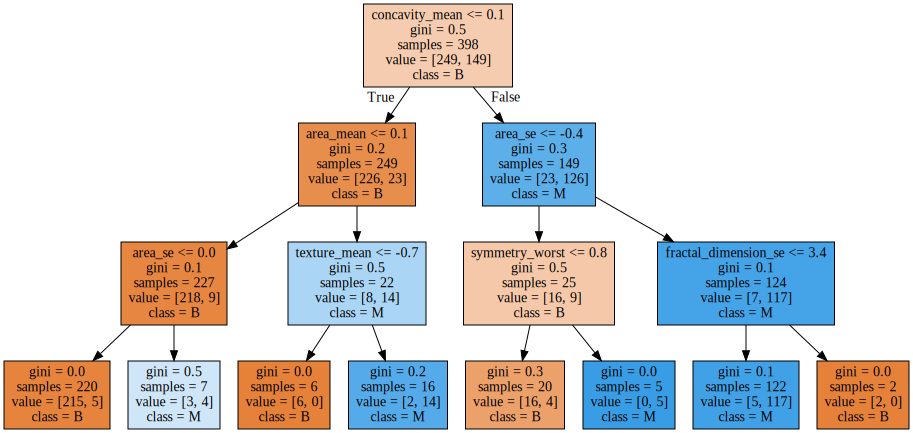

In [184]:
import graphviz
exported = tree.export_graphviz( decision_tree=tree2,
                                out_file=None,
                                feature_names=x.columns,
                                precision=1,
                                class_names=['B','M'], 
                                filled = True)
graph = graphviz.Source(exported) 
display(graph)

## M3: Ramdom Forest 

In [187]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1000, random_state= 42)
forest = forest.fit(x_train,y_train)

In [190]:
score(forest, x_train, y_train, x_test, y_test, train=True)

Train Result:

Accuracy Score: 100.00%
Precision Score: 100.00%
Recall Score: 100.00%
F1 score: 100.00%
Confusion Matrix:
 [[249   0]
 [  0 149]]


In [191]:
score(forest, x_train, y_train, x_test, y_test, train=False)

Test Result:

Accuracy Score: 97.08%
Precision Score: 96.77%
Recall Score: 95.24%
F1 score: 96.00%
Confusion Matrix:
 [[106   2]
 [  3  60]]


Next, go with tuning! The article of random forest here provides details in hyperparameter tuning: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [193]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [194]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [195]:
forest2 = RandomForestClassifier(random_state=42)

#Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest2, param_distributions=random_grid,
                              n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(x_train,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [196]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [198]:
forest3 = RandomForestClassifier(bootstrap=True,
                                 max_depth=20, 
                                 max_features='sqrt', 
                                 min_samples_leaf=2, 
                                 min_samples_split=2,
                                 n_estimators=1200)
forest3 = forest3.fit(x_train, y_train)

In [199]:
score(forest3, x_train, y_train, x_test, y_test, train=True)

Train Result:

Accuracy Score: 99.50%
Precision Score: 100.00%
Recall Score: 98.66%
F1 score: 99.32%
Confusion Matrix:
 [[249   0]
 [  2 147]]


In [200]:
score(forest3, x_train, y_train, x_test, y_test, train=False)

Test Result:

Accuracy Score: 97.08%
Precision Score: 96.77%
Recall Score: 95.24%
F1 score: 96.00%
Confusion Matrix:
 [[106   2]
 [  3  60]]


## M4: SVM 

The important parameters details in SVM model can be founded in here: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769 

In [205]:
from sklearn.svm import SVC

svm = SVC()
svm = svm.fit(x_train,y_train)

In [206]:
score(svm, x_train, y_train, x_test, y_test, train=True)

Train Result:

Accuracy Score: 97.99%
Precision Score: 99.30%
Recall Score: 95.30%
F1 score: 97.26%
Confusion Matrix:
 [[248   1]
 [  7 142]]


In [207]:
score(svm, x_train, y_train, x_test, y_test, train=False)

Test Result:

Accuracy Score: 95.91%
Precision Score: 95.16%
Recall Score: 93.65%
F1 score: 94.40%
Confusion Matrix:
 [[105   3]
 [  4  59]]


In [209]:
from sklearn.model_selection import GridSearchCV

svm_model = SVC()

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('poly', 'rbf')}

svm_grid = GridSearchCV(svm_model, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_grid.fit(x_train, y_train)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 107 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:    7.2s finished
/Users/nancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1),
                         'kernel': ('poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [210]:
svm_grid.best_params_

{'C': 20, 'gamma': 0.01, 'kernel': 'rbf'}

In [212]:
svm2 = SVC(C=2, gamma=0.01, kernel='rbf')
svm2 = svm2.fit(x_train, y_train)

In [213]:
score(svm2, x_train, y_train, x_test, y_test, train=True)

Train Result:

Accuracy Score: 96.98%
Precision Score: 99.28%
Recall Score: 92.62%
F1 score: 95.83%
Confusion Matrix:
 [[248   1]
 [ 11 138]]


In [214]:
score(svm2, x_train, y_train, x_test, y_test, train=False)

Test Result:

Accuracy Score: 97.08%
Precision Score: 96.77%
Recall Score: 95.24%
F1 score: 96.00%
Confusion Matrix:
 [[106   2]
 [  3  60]]


# Conclusion

In this kernel, we try to select the useful parameters by conducting visualization analysis. We also check the correlation matrix to avoid collinearity. After that, we use logistic, decision tree, random forest and SVM models for prediction, we even tune all this model to prevent over-fitting issue. Comparing the outcome, the logistic model gives the most precise prediction for our test data. 